In [20]:
import pandas as pd 
data =pd.read_csv("don.csv")
#print(data)
a = data["memory_utilization"].tolist()
b = data["cpu_utilization"].tolist()
c = data["errors_per_minute"].tolist()
d = data["requests_per_minute"].tolist()
e = data["av_response_time"].tolist()
print(data)
dataset = data.values
#print(dataset.astype('float32'))


     memory_utilization  cpu_utilization  errors_per_minute  \
0                 10.20           0.0815                0.0   
1                 15.30           0.2490                0.0   
2                 17.70           0.1230                0.0   
3                 19.80           0.2350                0.0   
4                 22.60           0.1970                0.0   
5                 24.40           0.2720                0.0   
6                 27.30           0.1990                0.0   
7                 29.30           0.1910                0.0   
8                 31.80           0.2540                0.0   
9                 34.30           0.1310                0.0   
10                36.30           0.2490                0.0   
11                26.40           0.2110                0.0   
12                13.50           0.2530                0.0   
13                12.10           0.2090                0.0   
14                14.10           0.0927               

      IN THIS WHOLE   WE TRYING TO MAKE SERIES TO PREDICT WETHER IN UPCOMING TIME  ACCORDING TO CPU UTILIZATION AND MEMORY UTLIZATION  WHAT IS  ERROR/PERMINUTE 

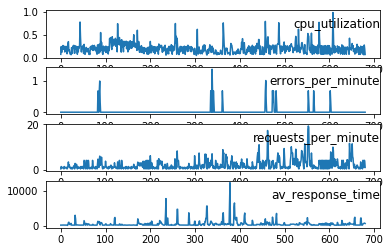

In [4]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('don.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()



   MAKING DATASET FROM THE DON.CSV FILE

In [21]:
              #  MAKING THE TRAINING AND TESTING DATASET 
print(len(data))
train_size = int(len(data) * 0.65)
print(train_size)
test_size = len(data) - train_size
print(test_size)
#train = data[0:train_size,:]
#test = data[train_size:len(dataset),:]
#print(data[0:train_size,:])
#train,test()

681
442
239


In [8]:
        # SPLIT INTO OUPUT ANS INPUT 
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
            

           #  RESHAPING OF THE TRAIN AND TEST DATA 
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
                                                          
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)                                                         
print(train_X.shape[0])
print(train_X.shape[1])
print(train_X.shape[2])
print(test_X.shape[0])
print(test_X.shape)

NameError: name 'train' is not defined

   MAKING  LSTM MODEL FOR TIME SERIES CONTINEOUS  DATA 

Train on 960 samples, validate on 473 samples
Epoch 1/70
3s - loss: 260.7995 - val_loss: 238.1760
Epoch 2/70
1s - loss: 258.5110 - val_loss: 234.1929
Epoch 3/70
1s - loss: 254.8491 - val_loss: 229.7455
Epoch 4/70
1s - loss: 250.5467 - val_loss: 224.7018
Epoch 5/70
1s - loss: 246.0609 - val_loss: 219.1023
Epoch 6/70
1s - loss: 241.0049 - val_loss: 213.5544
Epoch 7/70
1s - loss: 236.1322 - val_loss: 207.8180
Epoch 8/70
1s - loss: 231.1589 - val_loss: 202.6240
Epoch 9/70
1s - loss: 226.3275 - val_loss: 196.3958
Epoch 10/70
1s - loss: 221.5130 - val_loss: 191.2190
Epoch 11/70
1s - loss: 216.8700 - val_loss: 186.0717
Epoch 12/70
1s - loss: 212.2475 - val_loss: 180.7333
Epoch 13/70
1s - loss: 207.9540 - val_loss: 175.5983
Epoch 14/70
1s - loss: 203.8050 - val_loss: 171.3855
Epoch 15/70
1s - loss: 199.7830 - val_loss: 165.2401
Epoch 16/70
1s - loss: 195.4782 - val_loss: 160.5905
Epoch 17/70
1s - loss: 192.7273 - val_loss: 158.3747
Epoch 18/70
1s - loss: 191.3014 - val_loss: 157.0078
Epoch 19/

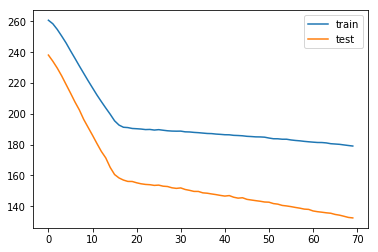

In [59]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_erro





model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=2, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [63]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
# make a prediction
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(473, 1, 4)
Test RMSE: 361.131
